In [15]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_cherry_and_middle_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [16]:
data

['t_n55          9.8292 ( 9.3982, 10.2957) ( 9.3944, 10.2908)  0.8963 (Jnode 106)\n',
 't_n56          9.7447 ( 9.3357, 10.1778) ( 9.3218, 10.1587)  0.8370 (Jnode 105)\n',
 't_n57          9.0187 ( 8.6779,  9.3635) ( 8.6843,  9.3668)  0.6825 (Jnode 104)\n',
 't_n58          7.7518 ( 7.5343,  7.9655) ( 7.5349,  7.9656)  0.4307 (Jnode 103)\n',
 't_n59          7.4578 ( 7.2588,  7.6574) ( 7.2521,  7.6486)  0.3965 (Jnode 102)\n',
 't_n60          7.1419 ( 6.9547,  7.3294) ( 6.9475,  7.3200)  0.3724 (Jnode 101)\n',
 't_n61          6.6713 ( 6.4910,  6.8493) ( 6.4941,  6.8516)  0.3575 (Jnode 100)\n',
 't_n62          3.3571 ( 3.0639,  3.7095) ( 3.0600,  3.7046)  0.6446 (Jnode 99)\n',
 't_n63          5.1994 ( 4.9863,  5.3736) ( 4.9956,  5.3803)  0.3847 (Jnode 98)\n',
 't_n64          4.1222 ( 3.9139,  4.2694) ( 3.9234,  4.2767)  0.3532 (Jnode 97)\n',
 't_n65          3.7215 ( 3.5260,  3.8624) ( 3.5299,  3.8640)  0.3341 (Jnode 96)\n',
 't_n66          3.0841 ( 2.9173,  3.2092) ( 2.9204,  3.21

In [17]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [18]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_iqtree.append(float(line[3][1:-1]))
    else:
        lower_ci_iqtree.append(float(line[3][1:-1]))
    if line[4].startswith('('):
        upper_ci_iqtree.append(float(line[4][1:-1]))
    else:
        upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))

for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [19]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [20]:
posterior_mean_iqtree

[9.8292,
 9.7447,
 9.0187,
 7.7518,
 7.4578,
 7.1419,
 6.6713,
 3.3571,
 5.1994,
 4.1222,
 3.7215,
 3.0841,
 2.2963,
 1.6658,
 0.6943,
 4.0966,
 7.1867,
 6.493,
 6.6218,
 4.9881,
 4.4092,
 5.0605,
 7.1723,
 6.8179,
 6.567,
 6.2489,
 5.8098,
 5.6178,
 5.002,
 4.6055,
 4.2401,
 3.3895,
 3.0781,
 5.0939,
 4.2189,
 7.0079,
 1.8877,
 6.8237,
 6.4125,
 5.833,
 5.4497,
 4.1802,
 4.7209,
 5.5571,
 5.2608,
 4.7294,
 3.8935,
 4.7989,
 8.1607,
 6.3096,
 4.1305,
 3.3474,
 6.9662]

In [21]:
lower_ci_iqtree

[0.3982,
 0.3357,
 0.6779,
 0.5343,
 0.2588,
 0.9547,
 0.491,
 0.0639,
 0.9863,
 0.9139,
 0.526,
 0.9173,
 0.1967,
 0.649,
 0.6257,
 0.8414,
 0.0006,
 0.2643,
 0.466,
 0.7223,
 0.1293,
 0.0434,
 0.9953,
 0.6499,
 0.4037,
 0.0971,
 0.6787,
 0.4811,
 0.8704,
 0.4829,
 0.1338,
 0.3232,
 0.0543,
 0.9863,
 0.1609,
 0.8356,
 0.5537,
 0.6621,
 0.2748,
 0.7291,
 0.3727,
 0.0036,
 0.7017,
 0.3811,
 0.0627,
 0.4913,
 0.586,
 0.4782,
 0.8492,
 0.9039,
 0.6544,
 0.8711,
 0.4318]

In [22]:
upper_ci_iqtree

[10.2957,
 10.1778,
 9.3635,
 7.9655,
 7.6574,
 7.3294,
 6.8493,
 3.7095,
 5.3736,
 4.2694,
 3.8624,
 3.2092,
 2.394,
 1.7108,
 0.7787,
 4.3035,
 7.3742,
 6.7182,
 6.7784,
 5.2197,
 4.6878,
 5.1055,
 7.3468,
 6.9856,
 6.7311,
 6.4011,
 5.9427,
 5.7518,
 5.1258,
 4.7282,
 4.3645,
 3.4734,
 3.1414,
 5.2337,
 4.3424,
 7.1755,
 2.2583,
 6.9814,
 6.5459,
 5.9284,
 5.4946,
 4.3364,
 4.7687,
 5.7342,
 5.4682,
 4.9837,
 4.1952,
 5.0907,
 8.4819,
 6.695,
 4.5661,
 3.8696,
 7.5266]

In [23]:
file_LG = open("LG_cherry_and_middle_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_baseml.append(float(line[3][1:-1]))
    else:
         lower_ci_baseml.append(float(line[3][:-1]))
    if line[4].startswith('('):
        upper_ci_baseml.append(float(line[4][1:-1]))
    else:
         upper_ci_baseml.append(float(line[4][:-1]))
        
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

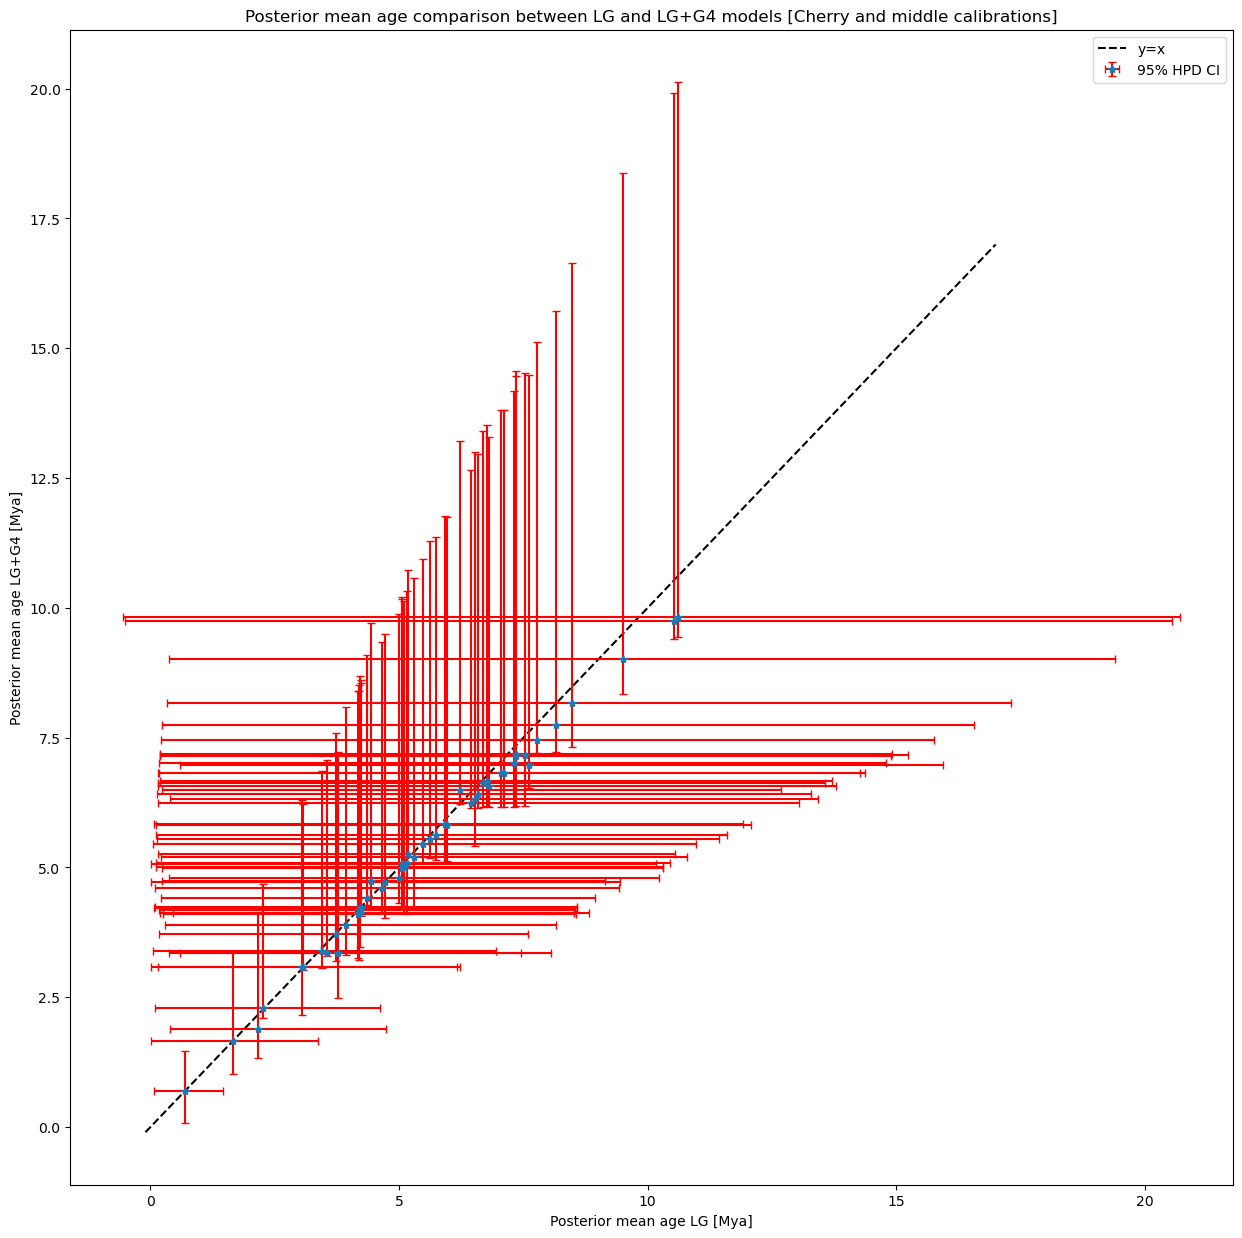

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4 models [Cherry and middle calibrations]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_cm.png')

In [25]:
posterior_mean_baseml

[10.6067,
 10.5272,
 9.5013,
 8.1666,
 7.7688,
 7.3481,
 6.7623,
 3.5443,
 5.3044,
 4.1926,
 3.7283,
 3.056,
 2.2692,
 1.6631,
 0.6911,
 4.1757,
 7.3558,
 6.2292,
 6.6961,
 5.0579,
 4.3521,
 5.0626,
 7.5286,
 7.1017,
 6.8146,
 6.4437,
 5.9749,
 5.737,
 5.1021,
 4.6573,
 4.2436,
 3.4462,
 3.0681,
 5.1674,
 4.2273,
 7.3118,
 2.1554,
 7.0599,
 6.5796,
 5.9188,
 5.4781,
 4.202,
 4.7124,
 5.6322,
 5.1711,
 4.4461,
 3.9268,
 4.9983,
 8.4819,
 6.5279,
 4.2099,
 3.7662,
 7.6112]

In [26]:
posterior_mean_iqtree

[9.8292,
 9.7447,
 9.0187,
 7.7518,
 7.4578,
 7.1419,
 6.6713,
 3.3571,
 5.1994,
 4.1222,
 3.7215,
 3.0841,
 2.2963,
 1.6658,
 0.6943,
 4.0966,
 7.1867,
 6.493,
 6.6218,
 4.9881,
 4.4092,
 5.0605,
 7.1723,
 6.8179,
 6.567,
 6.2489,
 5.8098,
 5.6178,
 5.002,
 4.6055,
 4.2401,
 3.3895,
 3.0781,
 5.0939,
 4.2189,
 7.0079,
 1.8877,
 6.8237,
 6.4125,
 5.833,
 5.4497,
 4.1802,
 4.7209,
 5.5571,
 5.2608,
 4.7294,
 3.8935,
 4.7989,
 8.1607,
 6.3096,
 4.1305,
 3.3474,
 6.9662]

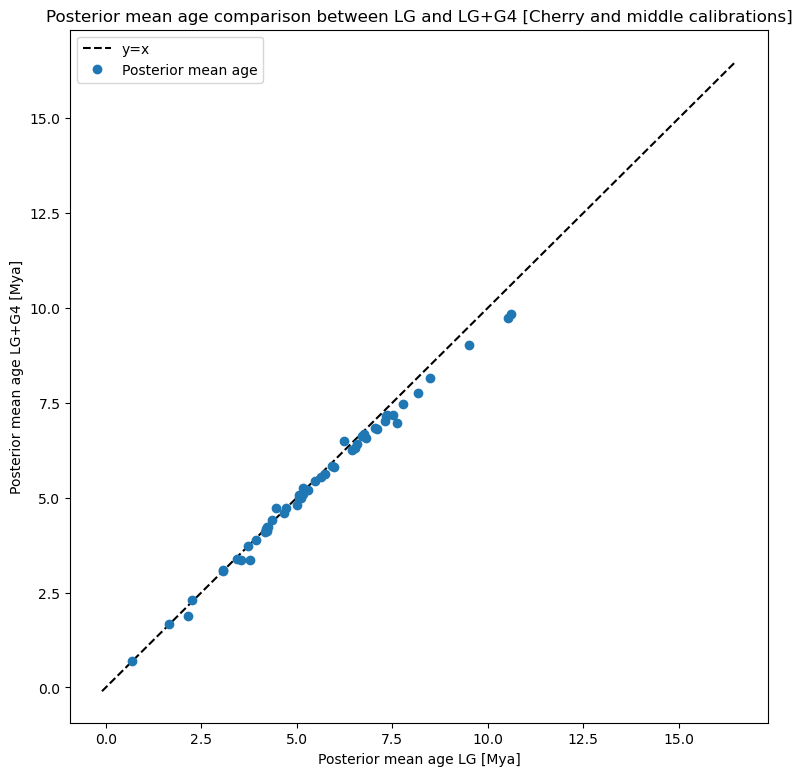

In [27]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,16.5], 
        [-0.1, 16.5], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4 [Cherry and middle calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_cm_scatter.png')

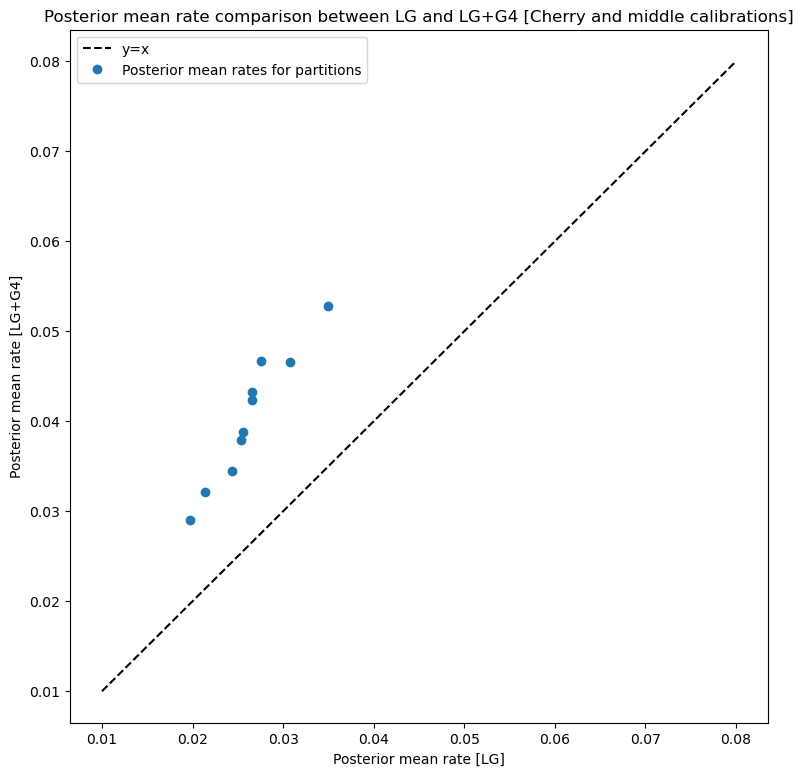

In [28]:
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([0.01,0.08], 
        [0.01, 0.08], 
        'k--', label='y=x')
ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
 
# Labels and title
ax.set_xlabel('Posterior mean rate [LG]')
ax.set_ylabel('Posterior mean rate [LG+G4]')
ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry and middle calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_rate_comparison_LG_G4_cm_scatter.png')